In [2]:
import os
import pandas as pd
import nbformat
import glob
import matplotlib.pyplot as plt

In [3]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/'
file_pattern = directory + '*_ActionSteps.ipynb'

#### Extracting Visualization Plots - Action Count and Time Spent by Completed Step

Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C002B_ActionSteps.ipynb


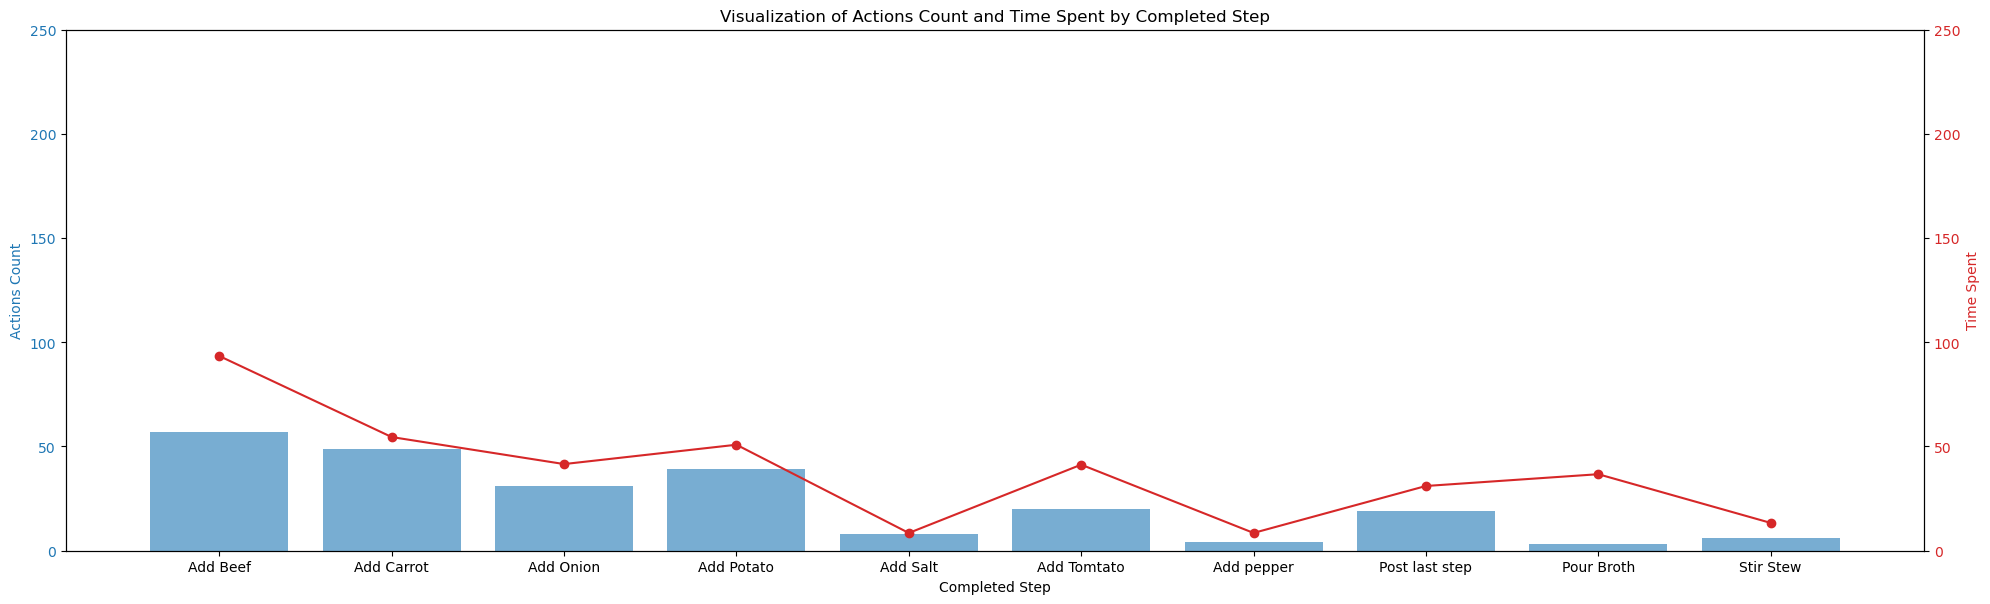

Extracted df_grouped from C002B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C004B_ActionSteps.ipynb


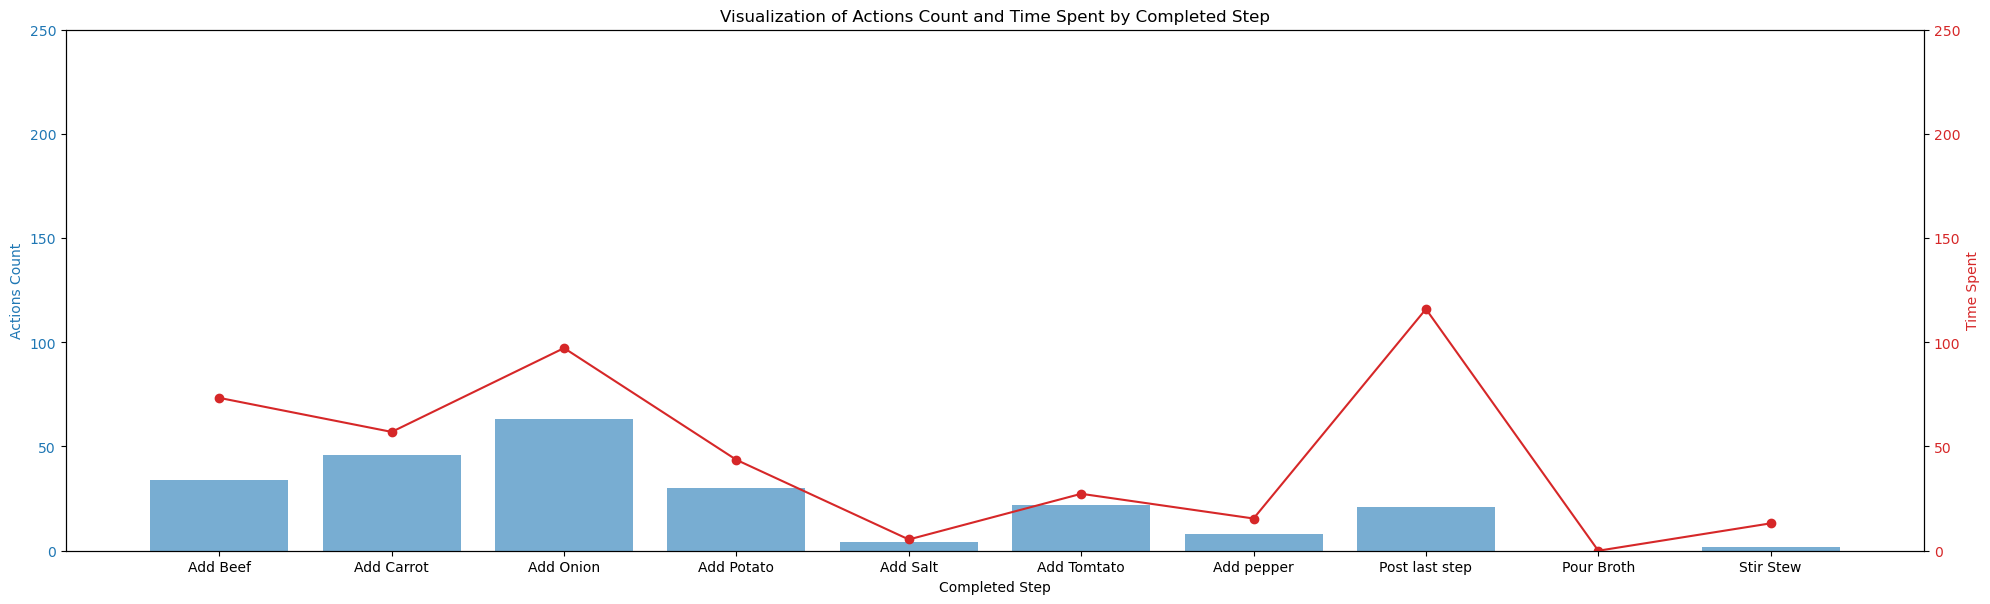

Extracted df_grouped from C004B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C005C_ActionSteps.ipynb


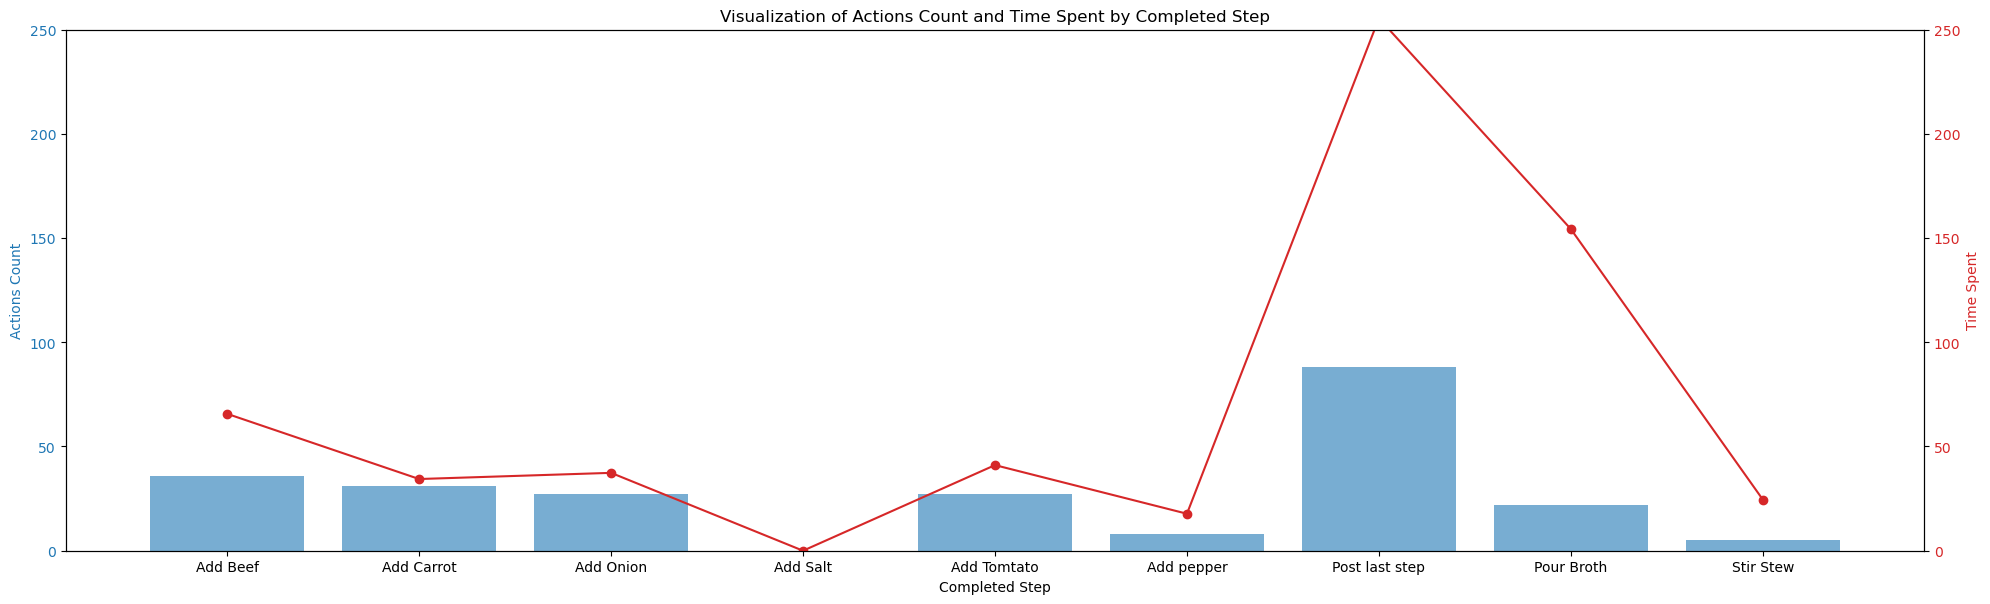

Extracted df_grouped from C005C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C010B_ActionSteps.ipynb


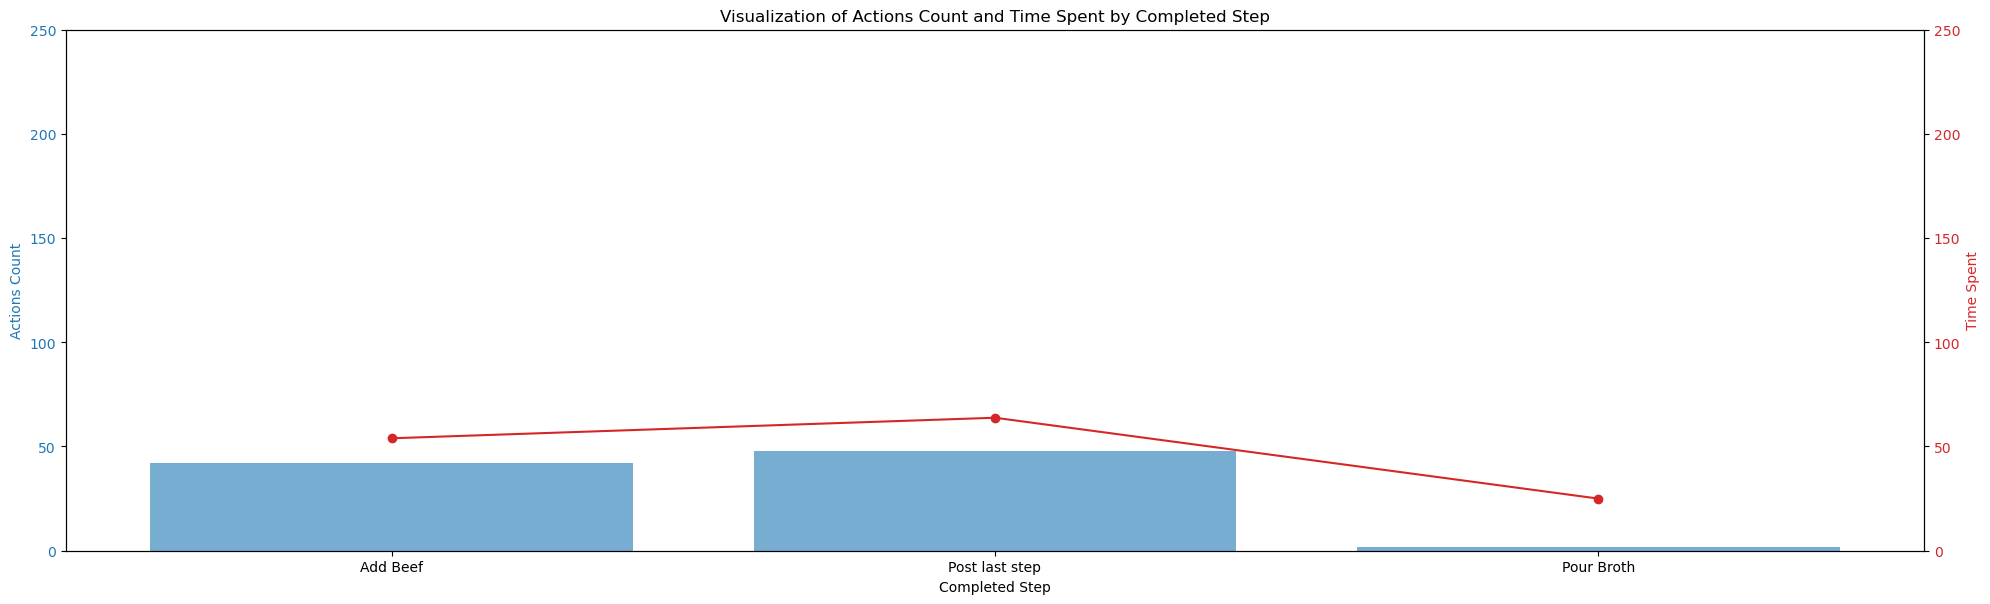

Extracted df_grouped from C010B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C011C_ActionSteps.ipynb


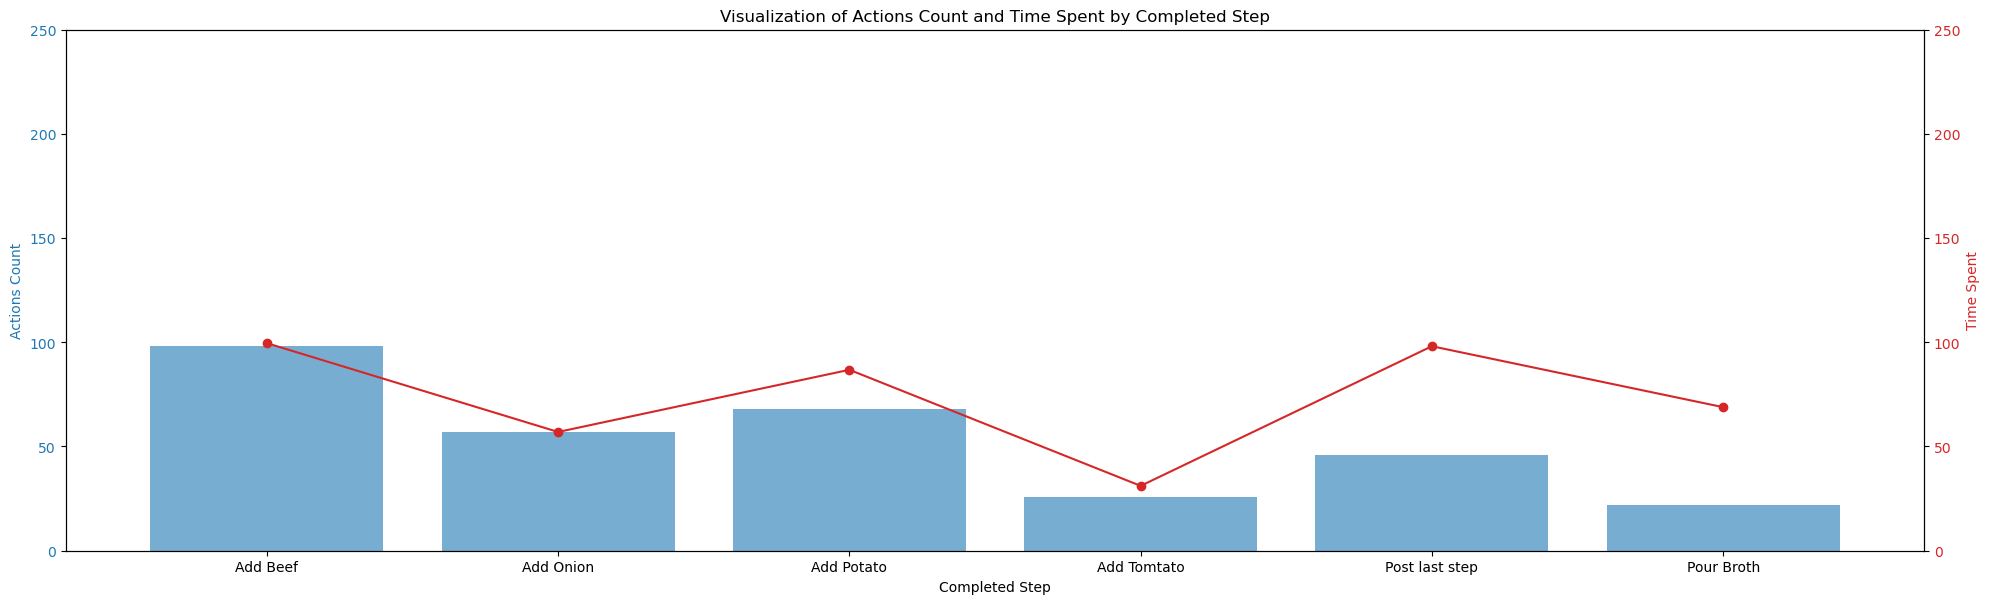

Extracted df_grouped from C011C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C014B_ActionSteps.ipynb


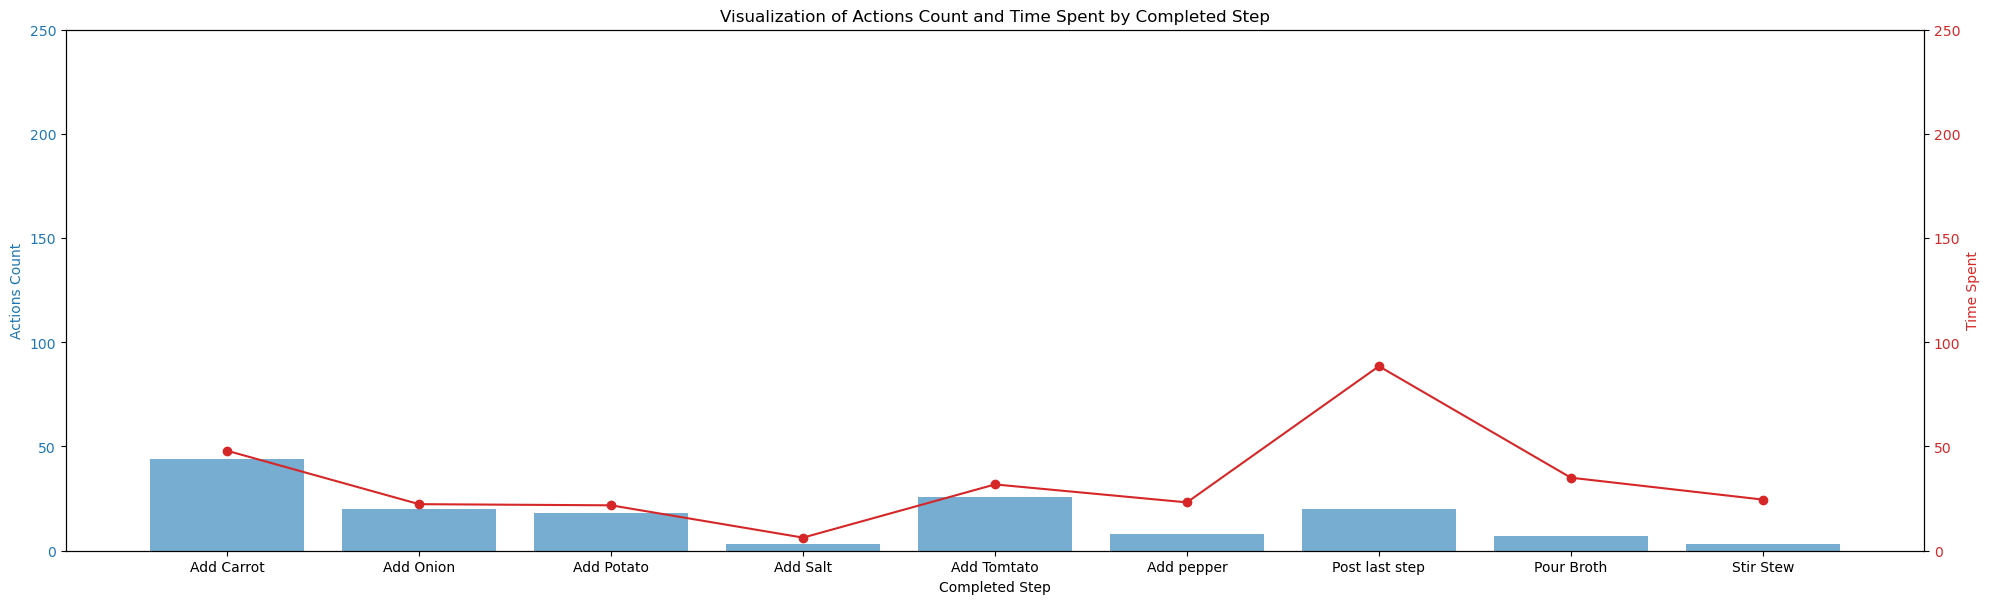

Extracted df_grouped from C014B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C015C_ActionSteps.ipynb


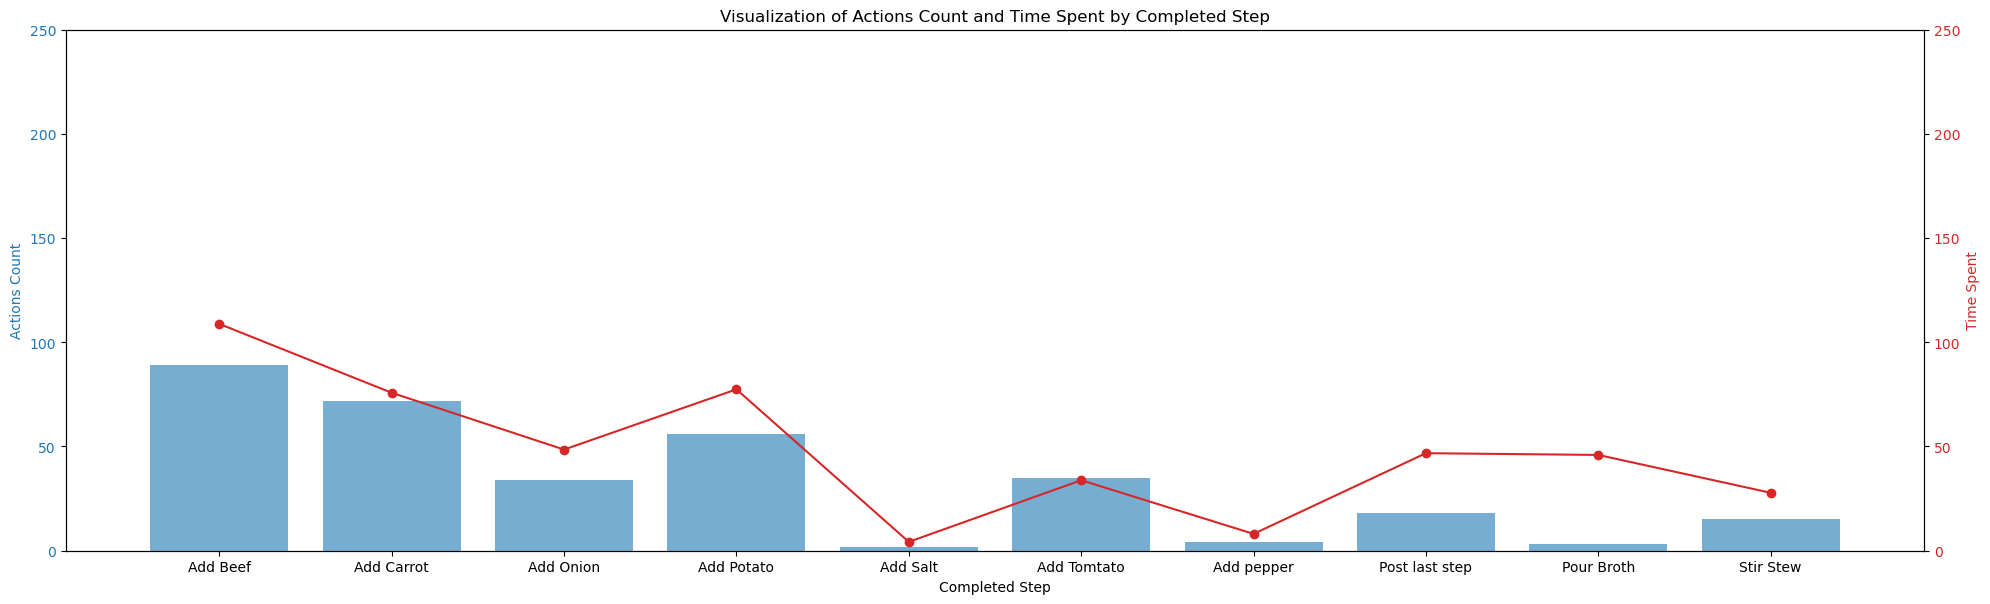

Extracted df_grouped from C015C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C018B_ActionSteps.ipynb


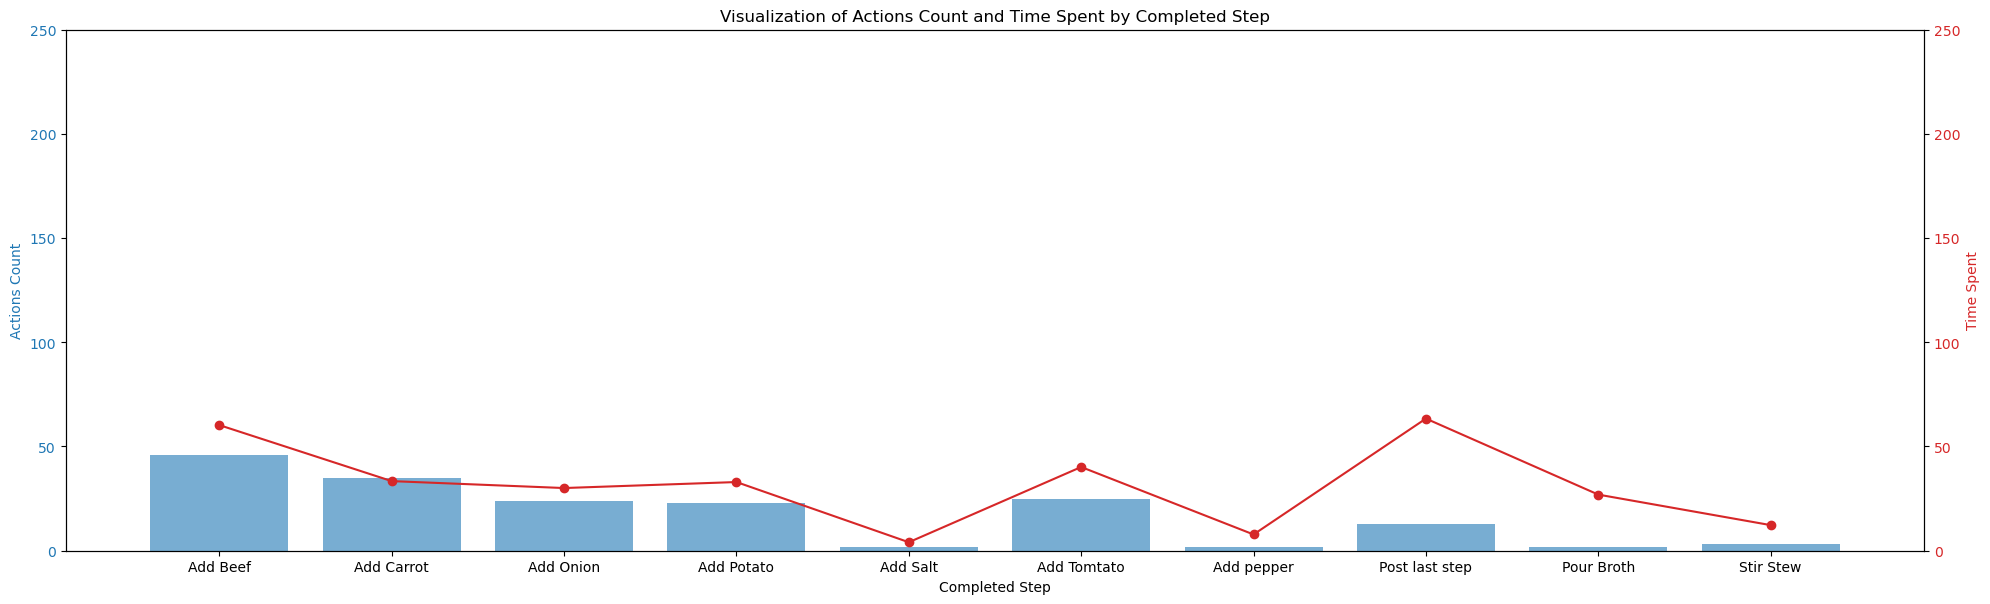

Extracted df_grouped from C018B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C019C_ActionSteps.ipynb


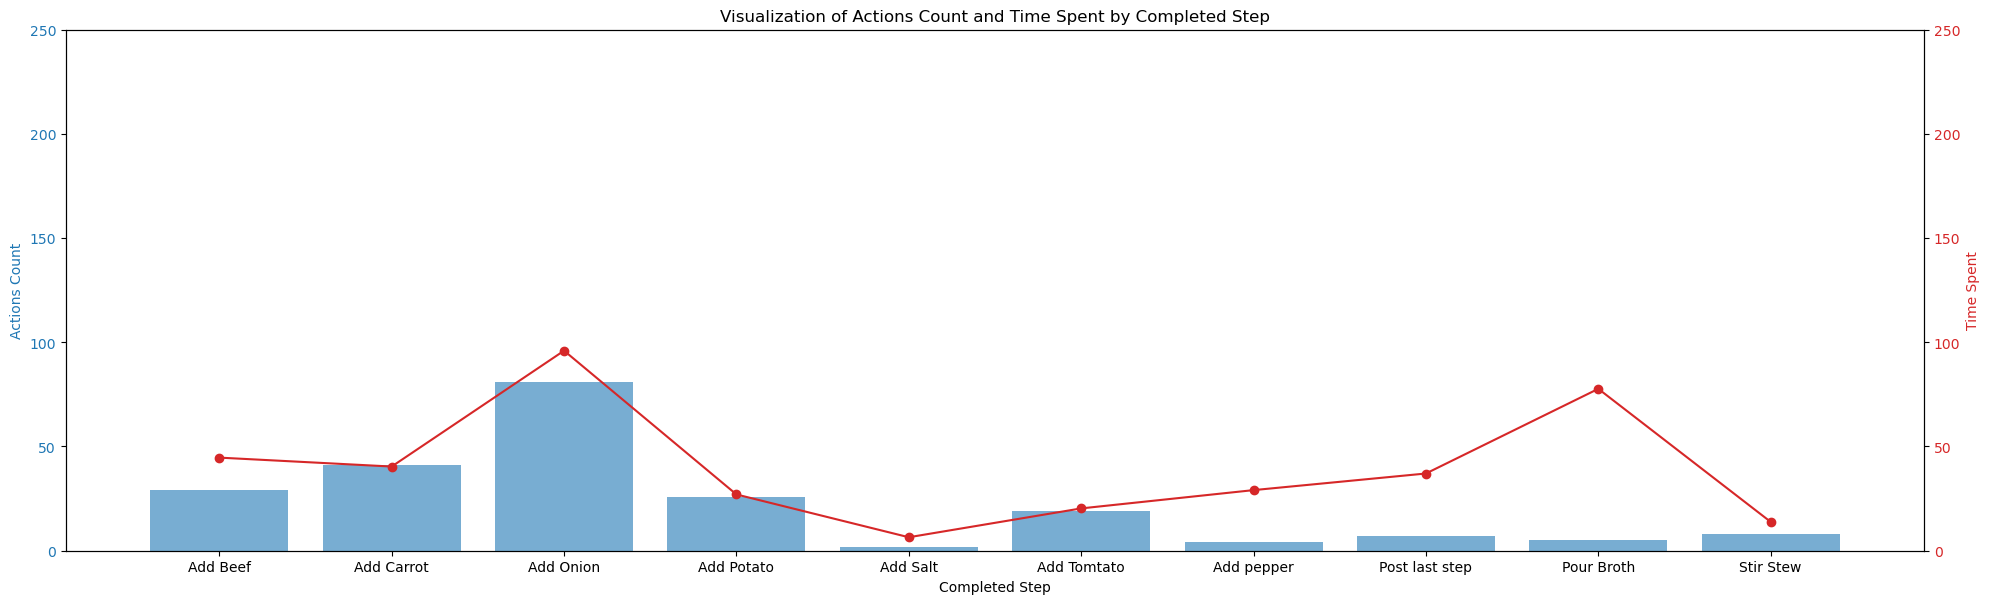

Extracted df_grouped from C019C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C022B_ActionSteps.ipynb


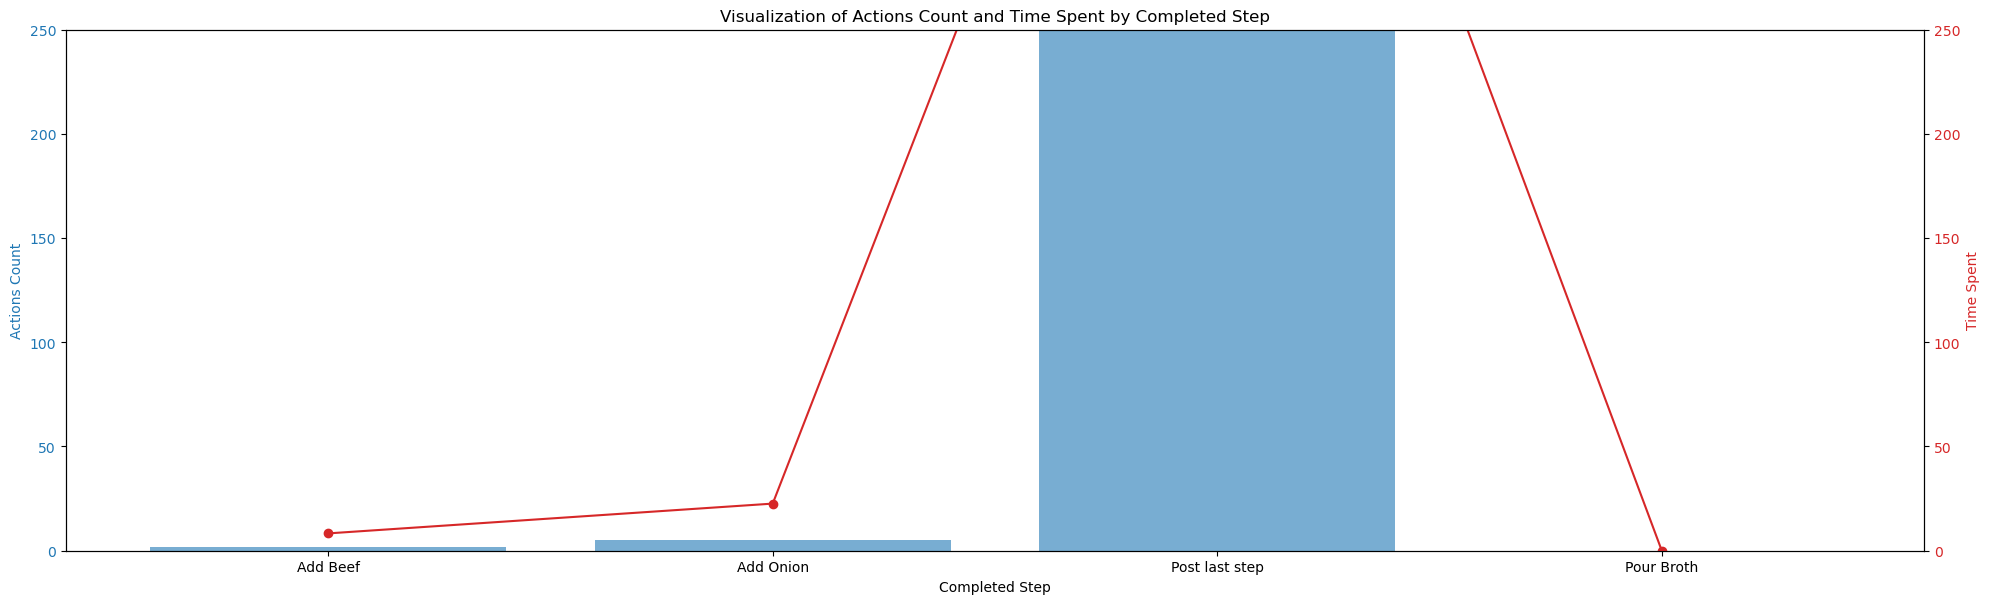

Extracted df_grouped from C022B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C023C_ActionSteps.ipynb


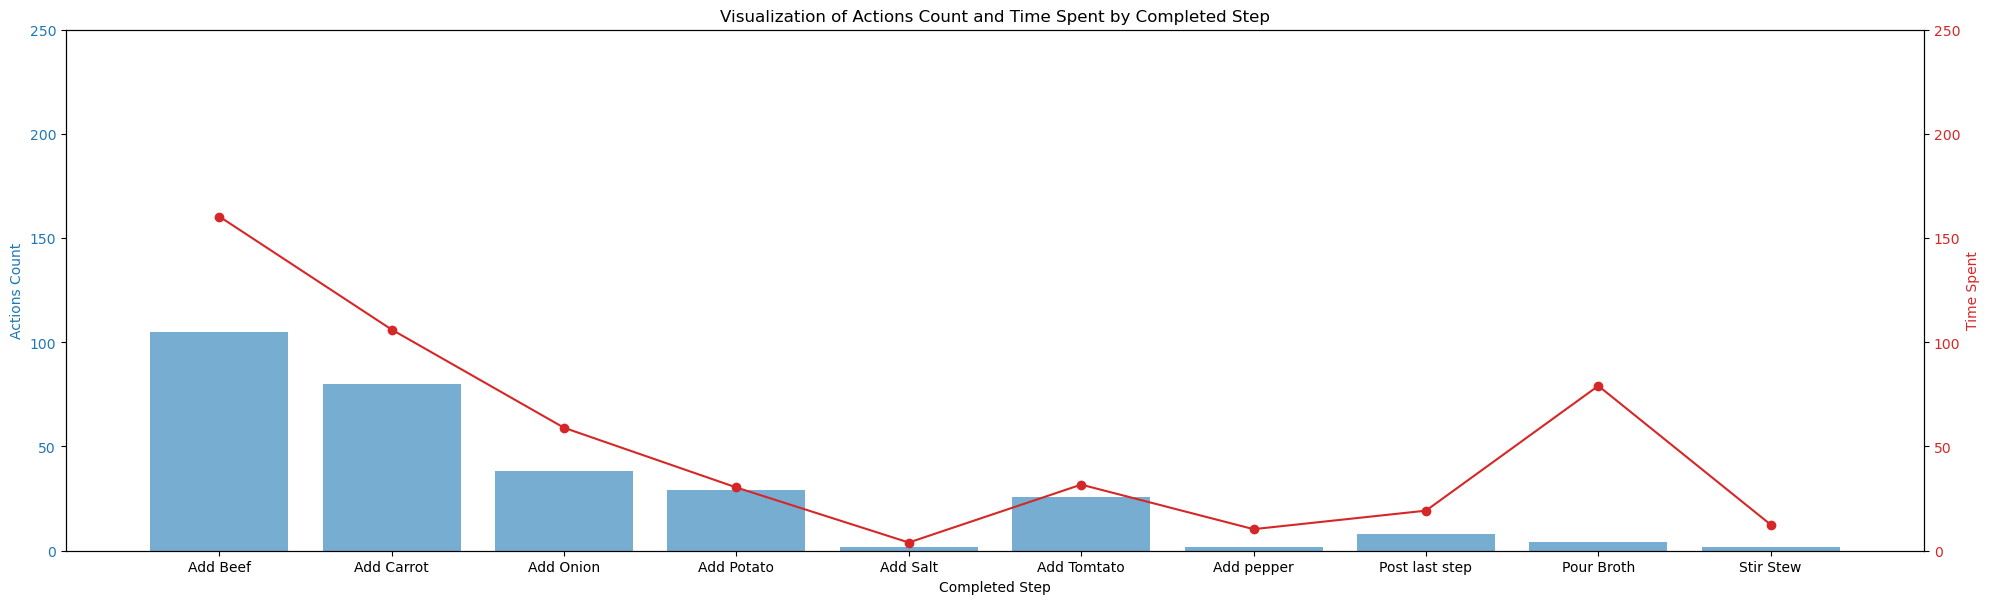

Extracted df_grouped from C023C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C026B_ActionSteps.ipynb


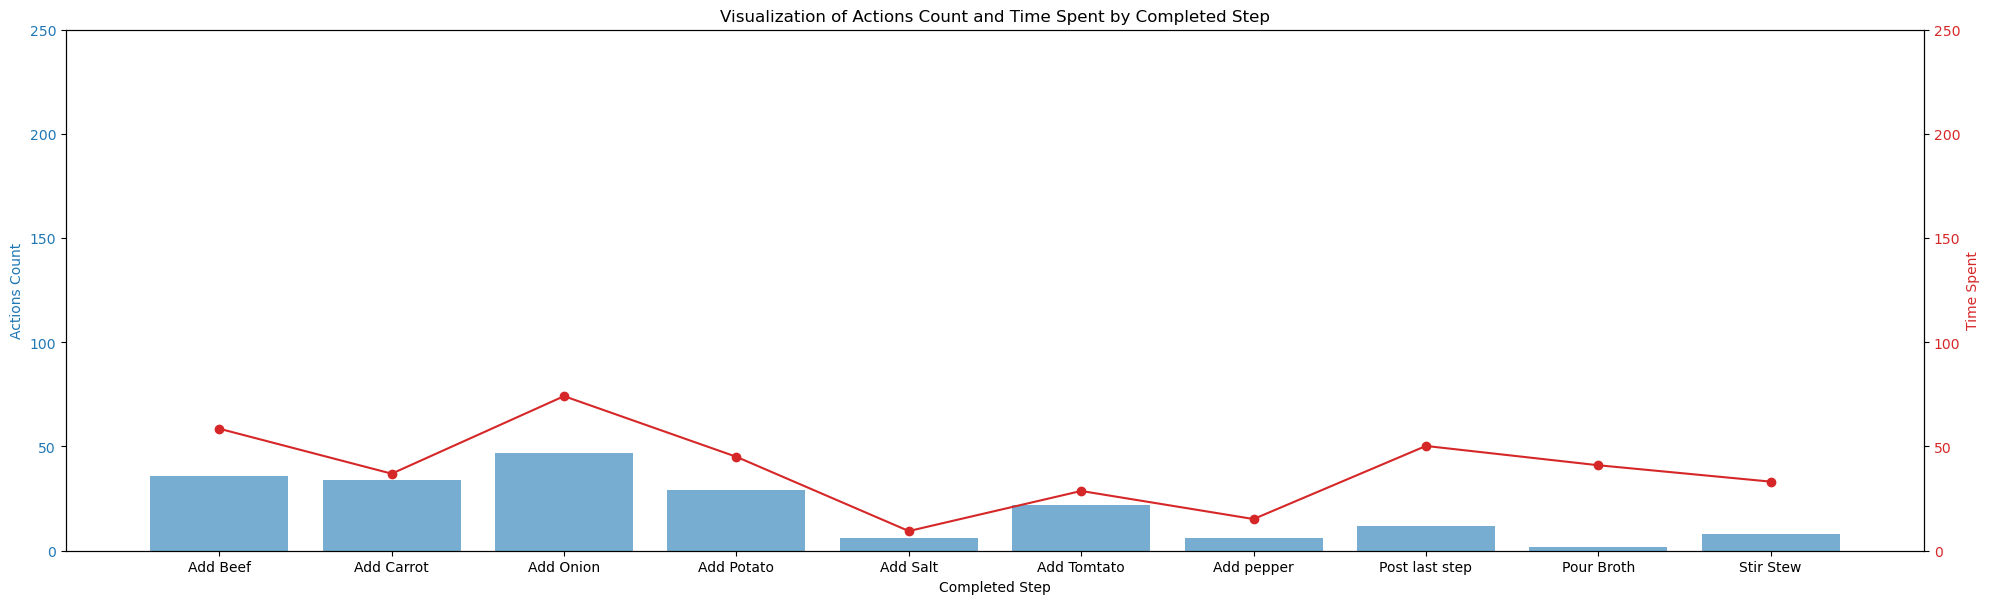

Extracted df_grouped from C026B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C027C_ActionSteps.ipynb


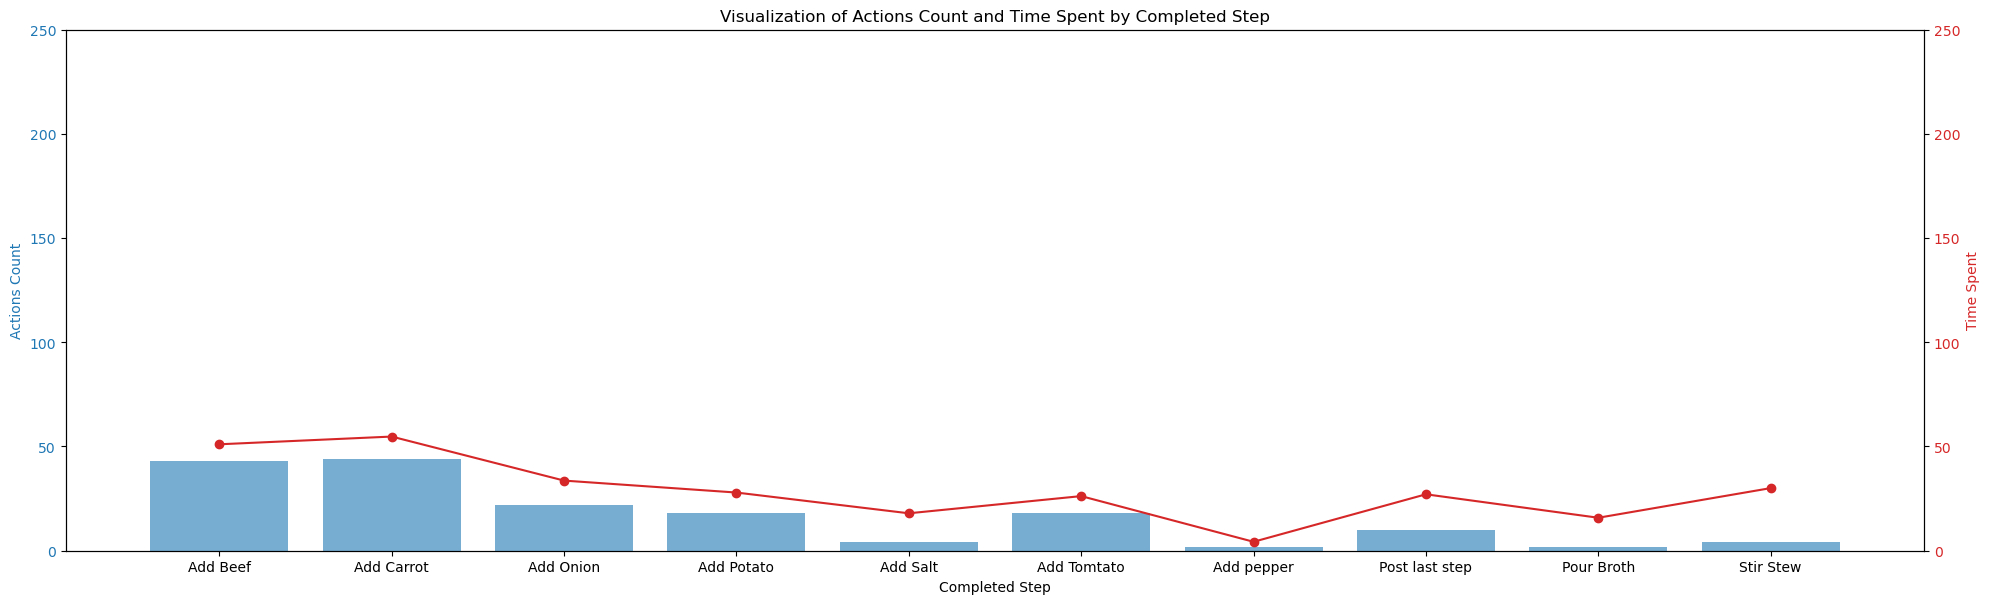

Extracted df_grouped from C027C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C030B_ActionSteps.ipynb


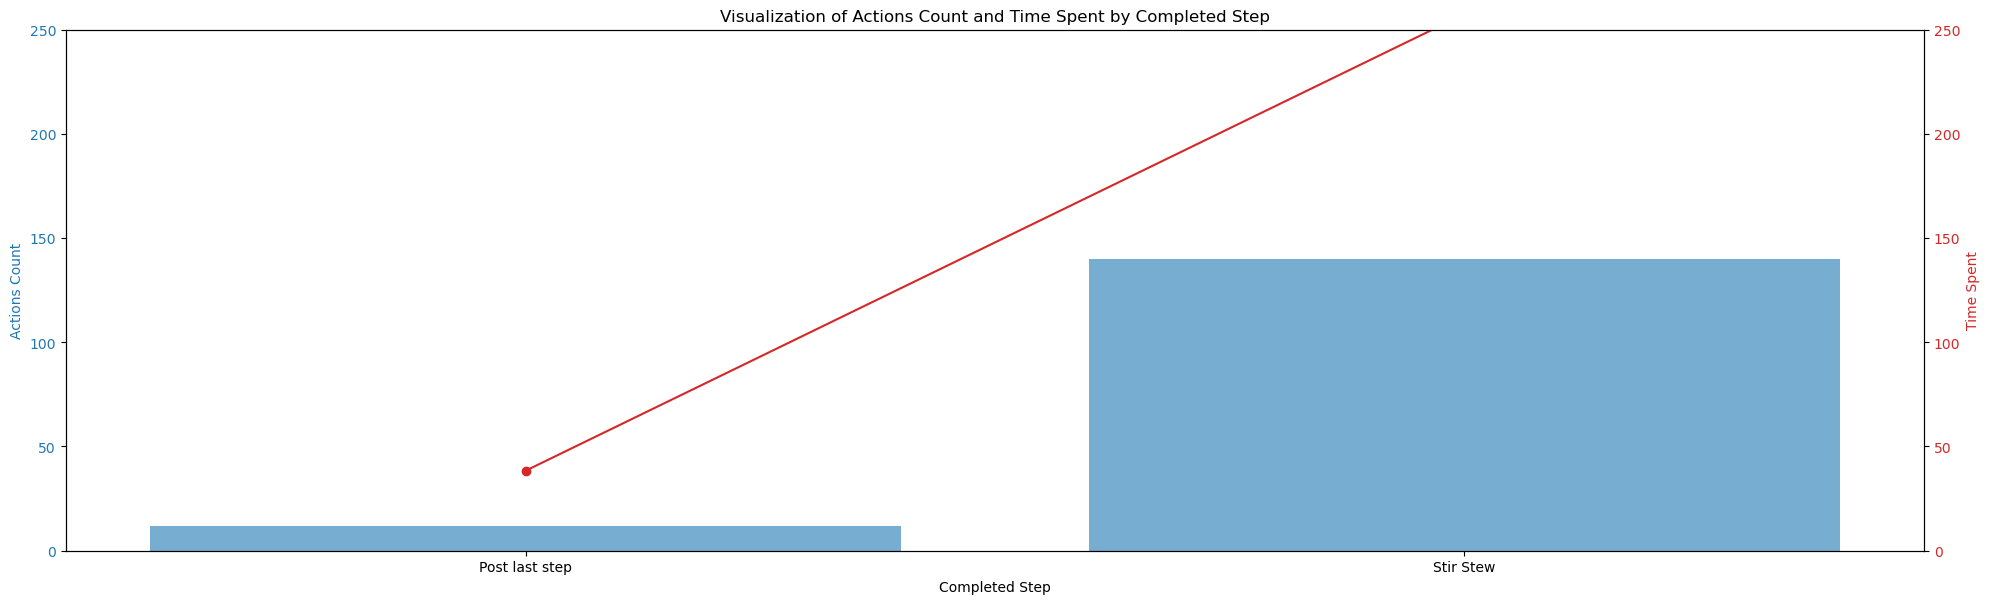

Extracted df_grouped from C030B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_ComplexStew/C031C_ActionSteps.ipynb


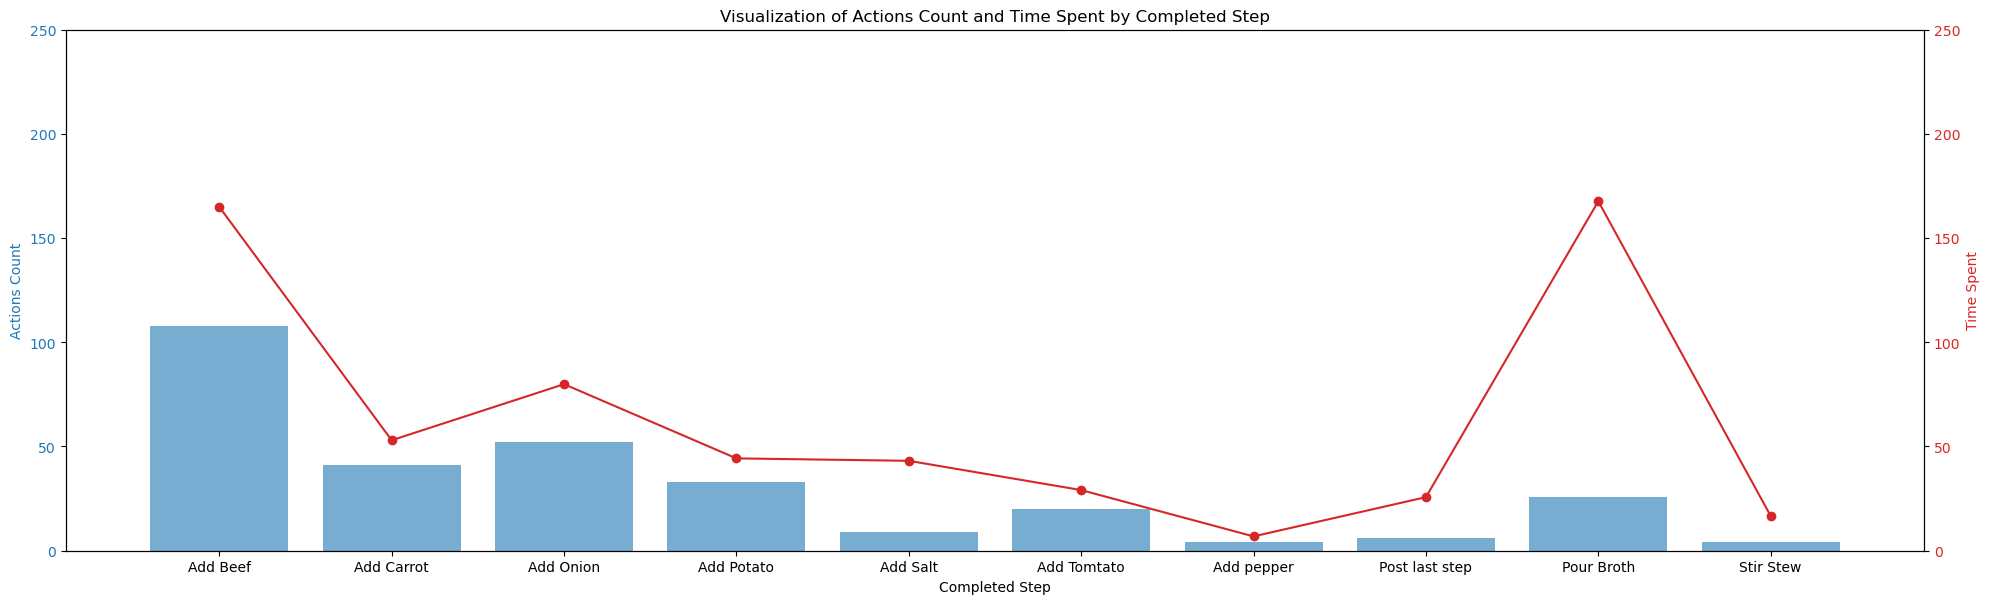

Extracted df_grouped from C031C_ActionSteps.ipynb


In [4]:
dfs = []

# extract totals_df
def extract_totals_df(nb):
    exec_env = {}
    df = None
    # Execute all cells to set up the environment
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, exec_env)
            except Exception as e:
                print(f"Error executing cell: {cell.source}\n{e}")

    # Extract totals_df
    df = exec_env.get('df_grouped')
    return df

# Process each notebook file
for filename in os.listdir(directory):
    if filename.endswith("_ActionSteps.ipynb"):
        filepath = os.path.join(directory, filename)
        print(f"Processing file: {filepath}")
        
        with open(filepath) as f:
            nb = nbformat.read(f, as_version=4)
        
        df = extract_totals_df(nb)
        
        if df is not None:
            print(f"Extracted df_grouped from {filename}")
            dfs.append(df)
        else:
            print(f"No df_grouped found in {filename}")

combined_df = pd.concat(dfs)


#### Extracting Action Counts for Participants according to every completed step

In [5]:
def extract_dataframe(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
        
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, {}, local_context)
                if 'result_df' in local_context:
                    return local_context['result_df']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

# List to store dataframes from each notebook
dataframes = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4]  # Extract the first 4 characters of the filename
    df = extract_dataframe(file_path)
    if df is not None:
        df['Participant'] = participant_id  # Add a new column for Participant ID
        dataframes.append(df)


combined_df = pd.concat(dataframes, ignore_index=True)
aggregated_data = combined_df.groupby(['Participant', 'Completed Step']).agg({'Actions Count': 'sum'}).reset_index()


In [6]:
pivot_table = aggregated_data.pivot_table(index='Completed Step', columns='Participant', values='Actions Count', fill_value=0)
pivot_table = pivot_table.astype(int)
statistics = pd.DataFrame()
statistics['Mean'] = pivot_table.mean(axis=1)
statistics['Median'] = pivot_table.median(axis=1)
statistics['Standard Deviation'] = pivot_table.std(axis=1)
final_table = pd.concat([pivot_table, statistics], axis=1)
final_table

,C002,C004,C005,C010,C011,C014,C015,C018,C019,C022,C023,C026,C027,C030,C031,Mean,Median,Standard Deviation
Completed Step,,,,,,,,,,,,,,,,,,
Add Beef,57,34,36,42,98,0,89,46,29,2,105,36,43,0,108,48.333333,42.0,36.589746
Add Carrot,49,46,31,0,0,44,72,35,41,0,80,34,44,0,41,34.466667,41.0,25.153434
Add Onion,31,63,27,0,57,20,34,24,81,5,38,47,22,0,52,33.400000,31.0,23.503191
Add Potato,39,30,0,0,68,18,56,23,26,0,29,29,18,0,33,24.600000,26.0,20.226574
Add Salt,8,4,0,0,0,3,2,2,2,0,2,6,4,0,9,2.800000,2.0,2.932576
Add Tomtato,20,22,27,0,26,26,35,25,19,0,26,22,18,0,20,19.066667,22.0,10.713587
Add pepper,4,8,8,0,0,8,4,2,4,0,2,6,2,0,4,3.466667,4.0,2.972893
Post last step,19,21,88,48,46,20,18,13,7,269,8,12,10,12,6,39.800000,18.0,67.080123
Pour Broth,3,0,22,2,22,7,3,2,5,0,4,2,2,0,26,6.666667,3.0,8.869423


In [7]:
pivot_table = aggregated_data.pivot_table(index='Completed Step', columns='Participant', values='Actions Count', fill_value=0)
pivot_table = pivot_table.astype(int)
pivot_table = pivot_table.transpose()
pivot_table['Action Count S.D'] = pivot_table.std(axis=1)
pivot_table

Completed Step,Add Beef,Add Carrot,Add Onion,Add Potato,Add Salt,Add Tomtato,Add pepper,Post last step,Pour Broth,Stir Stew,Action Count S.D
Participant,,,,,,,,,,,
C002,57,49,31,39,8,20,4,19,3,6,19.574360
C004,34,46,63,30,4,22,8,21,0,2,20.709633
C005,36,31,27,0,0,27,8,88,22,5,25.988031
C010,42,0,0,0,0,0,0,48,2,0,18.931455
C011,98,0,57,68,0,26,0,46,22,0,34.486874
C014,0,44,20,18,3,26,8,20,7,3,13.527339
C015,89,72,34,56,2,35,4,18,3,15,30.626060
C018,46,35,24,23,2,25,2,13,2,3,15.629388
C019,29,41,81,26,2,19,4,7,5,8,24.380320


In [8]:
#pivot_table.to_csv('ActionCountVariability_ComplexStew.csv')

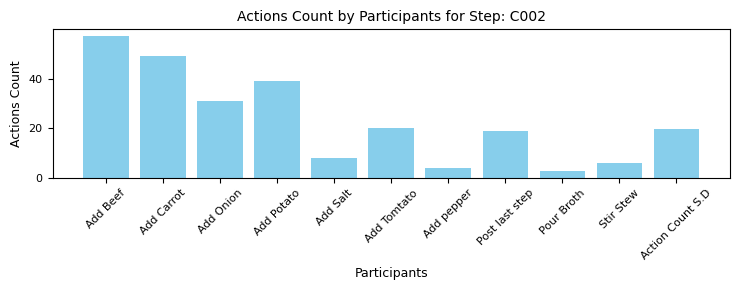

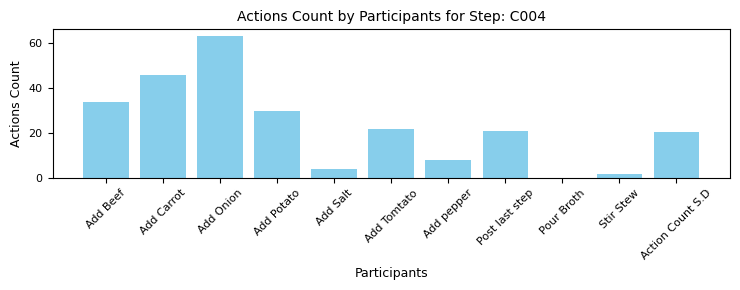

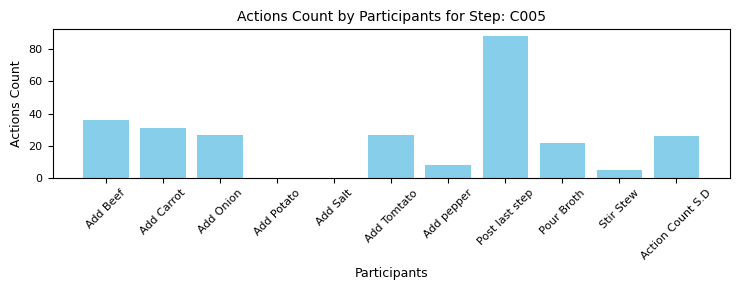

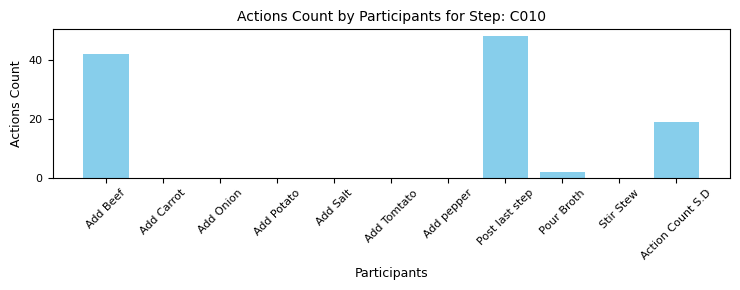

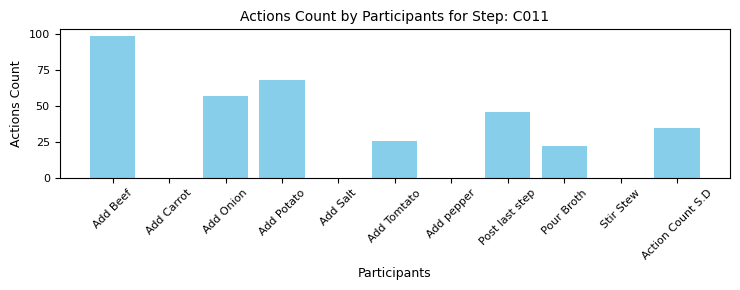

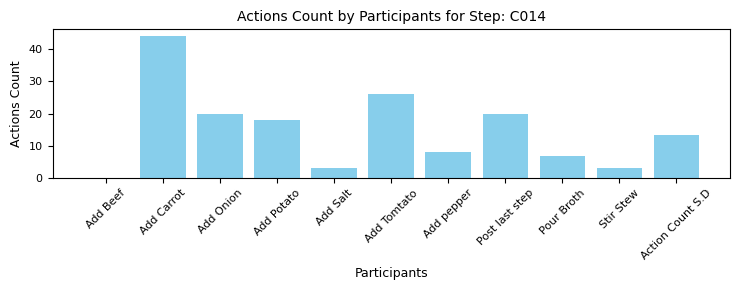

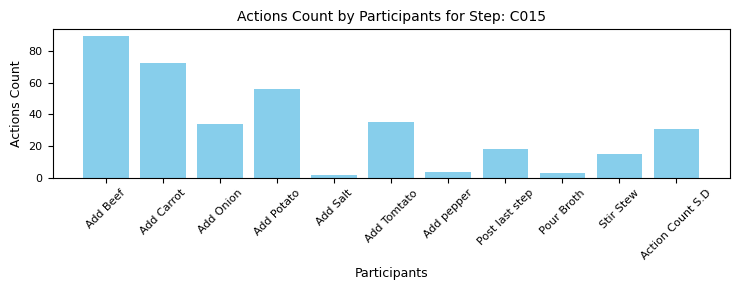

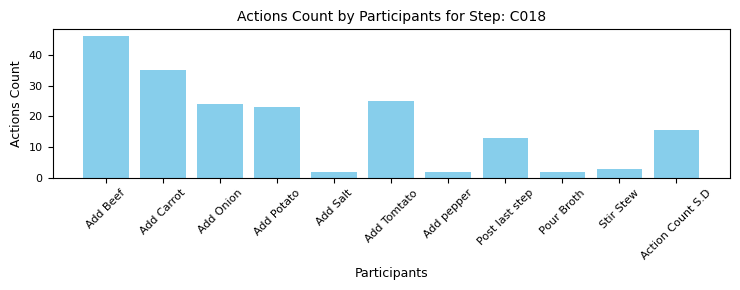

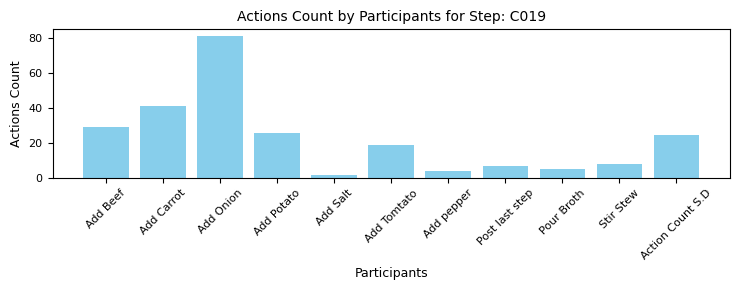

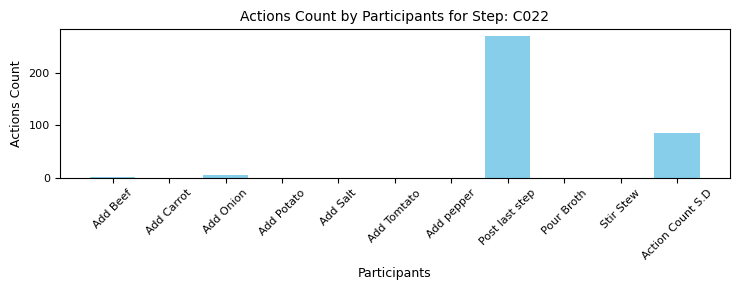

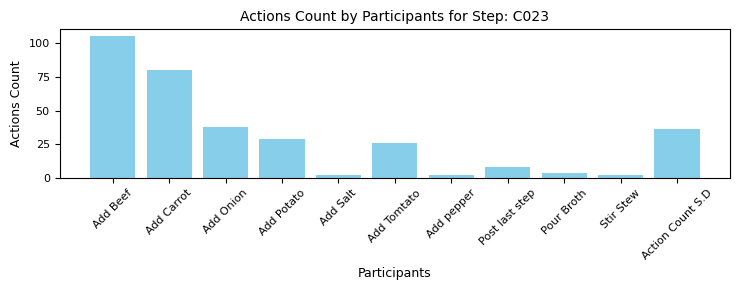

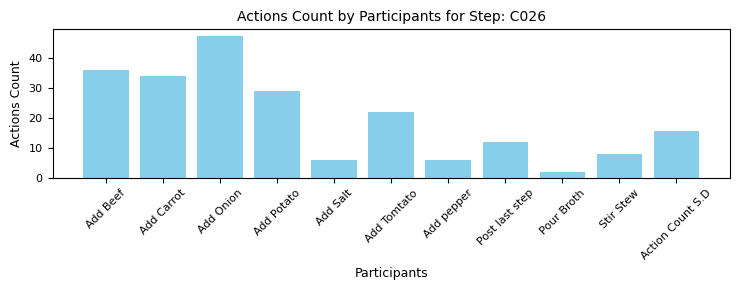

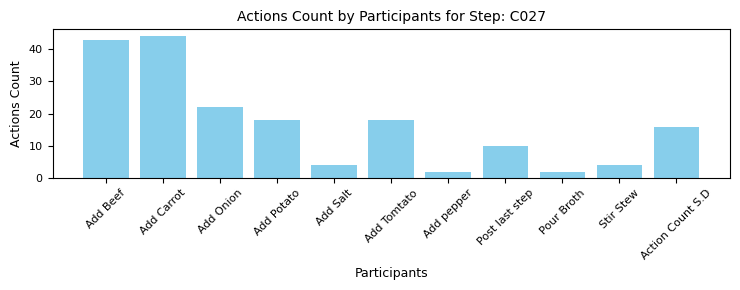

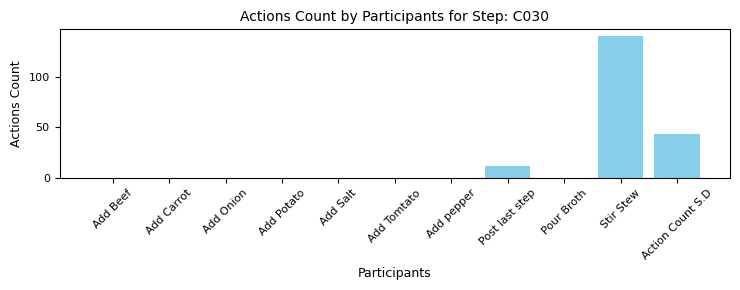

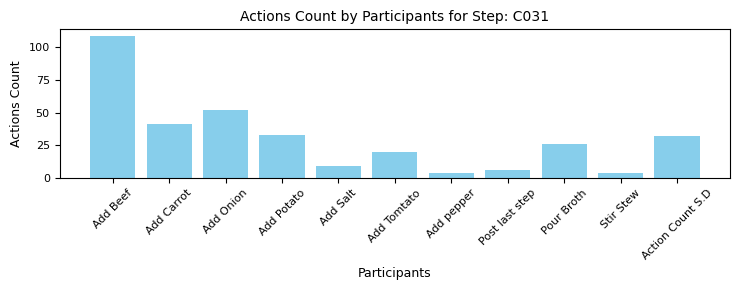

In [9]:
steps = pivot_table.index

for step in steps:
    plt.figure(figsize=(7.5,3))
    plt.bar(pivot_table.columns, pivot_table.loc[step], color='skyblue')
    plt.xlabel('Participants',fontsize=9)
    plt.ylabel('Actions Count',fontsize=9)
    plt.title(f'Actions Count by Participants for Step: {step}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()



#### Extracting Action Counts for every participant according to "Action Type"

In [10]:
def extract_features_summary(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                # Check if the cell contains plotting code and skip it
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'features_summary' in local_context:
                    return local_context['features_summary']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None
    
features_summaries = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_features_summary(file_path)
    if df is not None:
        df['Participant'] = participant_id 
        features_summaries.append(df)
    else:
        print(f"No features_summary found in {file_path}")

# Combine all features summaries into one dataframe
combined_features_summary = pd.concat(features_summaries, ignore_index=True)

In [11]:
pivot_table_sum = combined_features_summary.pivot_table(
    index='Action Type',
    columns='Participant',
    values='Action Count',
    aggfunc='sum',
    fill_value=0
)

pivot_table_sum=pivot_table_sum.transpose()
pivot_table_sum


Action Type,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released
Participant,,,,,
C002,35,0,0,112,89
C004,41,65,56,41,27
C005,33,27,16,106,62
C010,10,11,10,39,22
C011,25,55,20,133,84
C014,20,13,9,72,35
C015,55,24,20,135,94
C018,32,25,22,56,40
C019,33,0,0,101,88


In [12]:
#pivot_table_sum.to_csv('ActionType_ComplexStew.csv')

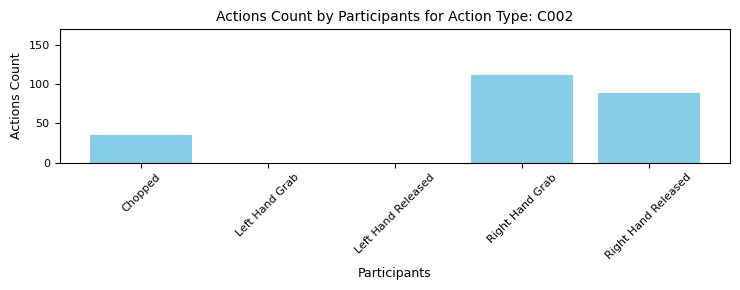

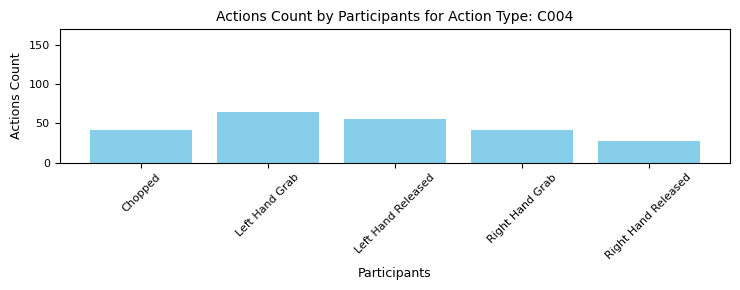

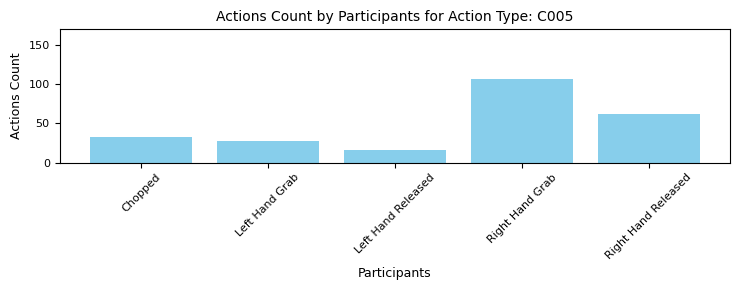

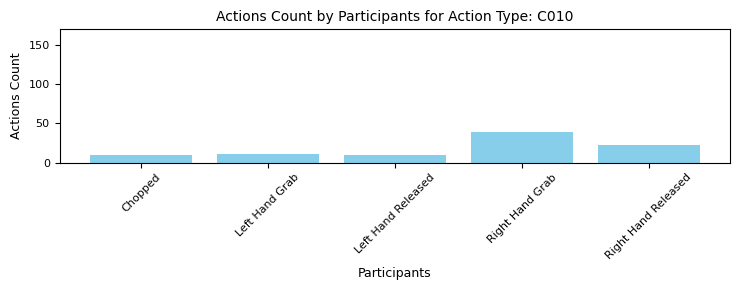

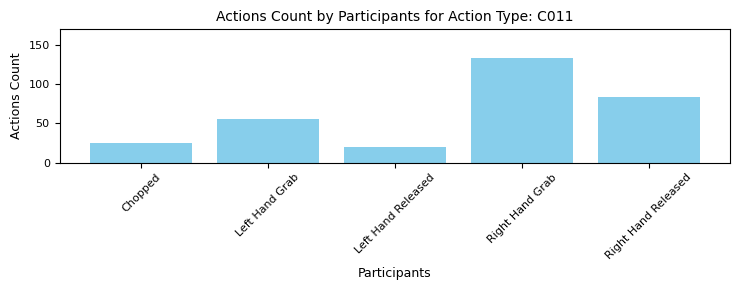

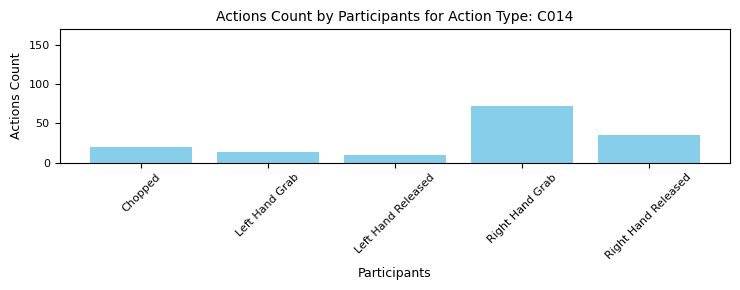

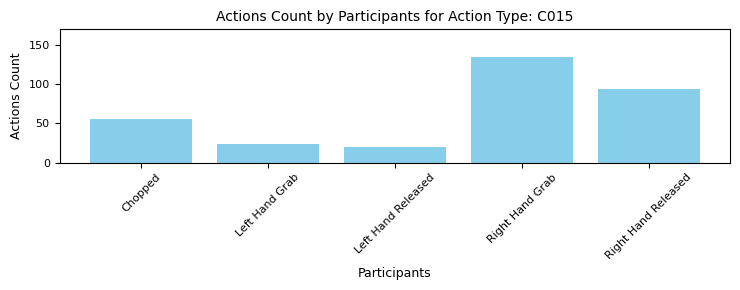

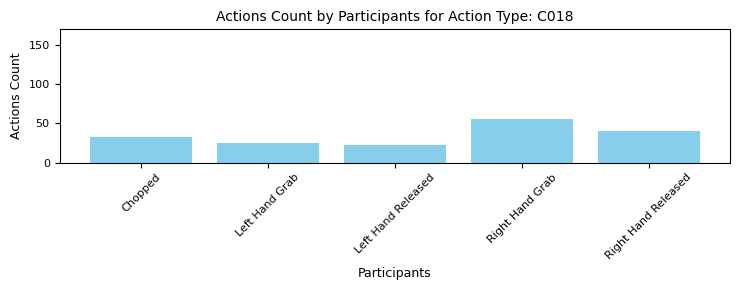

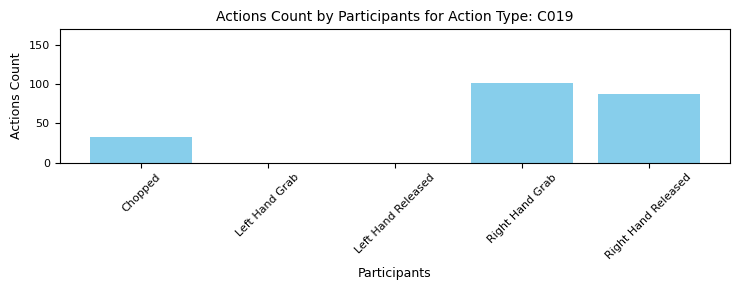

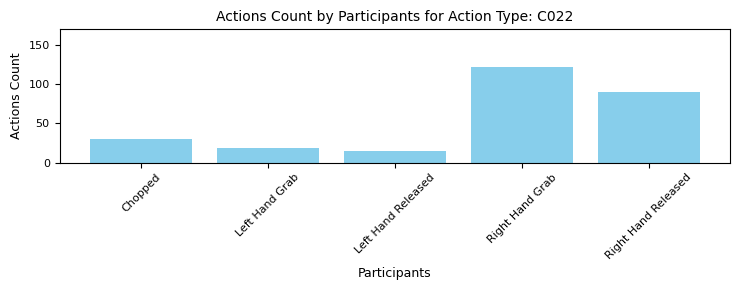

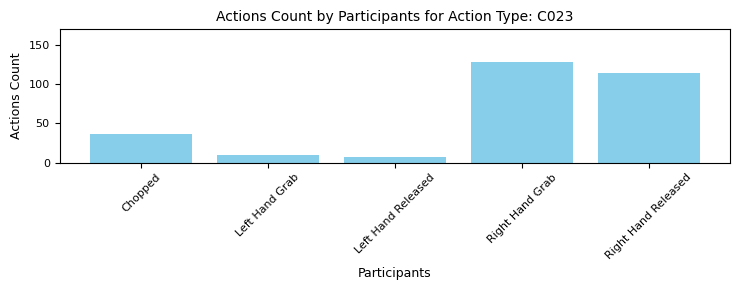

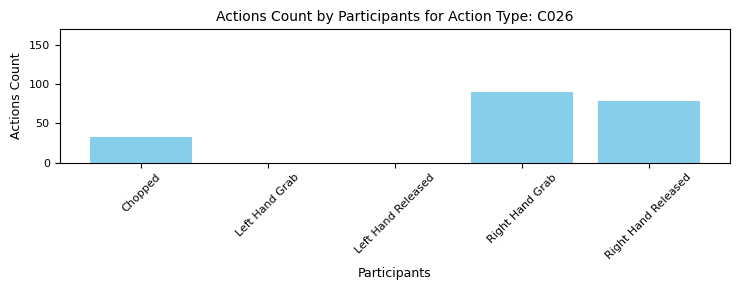

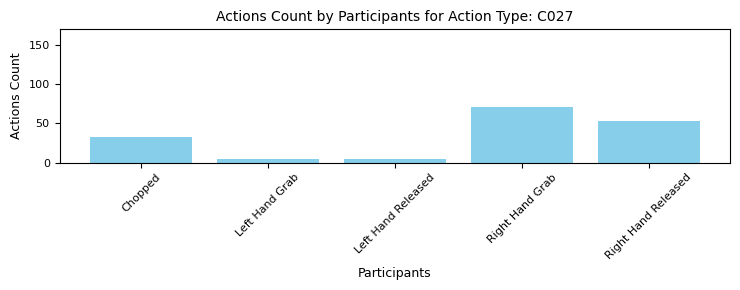

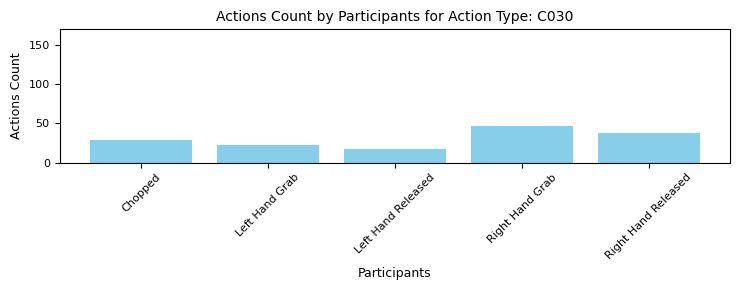

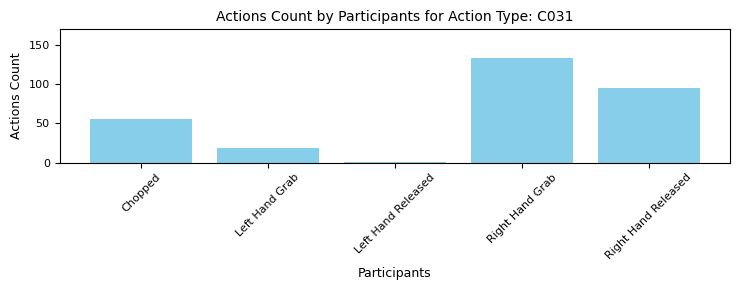

In [13]:
action_types = pivot_table_sum.index

for action_type in action_types:
    plt.figure(figsize=(7.5,3))
    plt.bar(pivot_table_sum.columns, pivot_table_sum.loc[action_type], color='skyblue')
    plt.xlabel('Participants', fontsize=9)
    plt.ylabel('Actions Count', fontsize=9)
    plt.title(f'Actions Count by Participants for Action Type: {action_type}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.ylim(0, 170)
    plt.tight_layout()
    plt.show()

#### Missed Interactions according to action type

In [14]:
pivot_table_missed= combined_features_summary.pivot_table(
    index='Action Type',
    columns='Participant',
    values='Total Missed Interactions',
    aggfunc='sum',
    fill_value=0
)
pivot_table_missed = pivot_table_missed.astype(int)
pivot_table_missed = pivot_table_missed.transpose()
pivot_table_missed

Action Type,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released
Participant,,,,,
C002,0,0,0,7,0
C004,0,7,0,4,0
C005,0,10,0,16,0
C010,0,1,0,14,0
C011,0,30,0,38,0
C014,0,2,0,11,0
C015,0,4,0,14,0
C018,0,1,0,5,0
C019,0,0,0,3,0


In [15]:
#pivot_table_missed.to_csv('ActionTypeMissed_ComplexStew.csv')

#### Time spent on every step by participants

In [16]:
def extract_steps_summary(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
        
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                # Check if the cell contains plotting code and skip it
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'steps_summary' in local_context:
                    return local_context['steps_summary']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None


dataframes = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_steps_summary(file_path)
    if df is not None:
        df['Participant'] = participant_id  
        dataframes.append(df)

comb_df = pd.concat(dataframes, ignore_index=True)
summary = comb_df.pivot_table(index='Participant', columns='Completed Step', values='Time Spent', fill_value=0)
summary

Completed Step,Add Beef,Add Carrot,Add Onion,Add Potato,Add Salt,Add Tomtato,Add pepper,Pour Broth,Stir Stew
Participant,,,,,,,,,
C002,93.387538,54.523803,41.562775,50.837463,8.509644,41.273314,8.527893,36.700148,13.345063
C004,73.308487,56.986449,97.204164,43.579651,5.395752,27.304598,15.448150,0.000000,13.134308
C005,65.661499,34.389406,37.351623,0.000000,0.000000,41.060852,17.740601,154.260528,24.501709
C010,53.932304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.001441,0.000000
C011,99.553366,0.000000,56.956099,86.782166,0.000000,31.109741,0.000000,68.857536,0.000000
C014,0.000000,47.952774,22.332230,21.776971,6.284394,31.794082,23.190292,35.024307,24.529907
C015,108.797832,75.765961,48.513123,77.412322,4.241577,33.809157,8.080658,45.941295,27.794861
C018,60.255347,33.387085,30.066162,32.940324,4.064178,40.155105,7.792816,26.915764,12.276520
C019,44.657440,40.374511,95.945953,26.989380,6.461853,20.296845,29.068512,77.652779,13.830994


In [17]:
summary['Time Spent S.D'] = summary.std(axis=1)
summary

Completed Step,Add Beef,Add Carrot,Add Onion,Add Potato,Add Salt,Add Tomtato,Add pepper,Pour Broth,Stir Stew,Time Spent S.D
Participant,,,,,,,,,,
C002,93.387538,54.523803,41.562775,50.837463,8.509644,41.273314,8.527893,36.700148,13.345063,27.092263
C004,73.308487,56.986449,97.204164,43.579651,5.395752,27.304598,15.448150,0.000000,13.134308,33.319354
C005,65.661499,34.389406,37.351623,0.000000,0.000000,41.060852,17.740601,154.260528,24.501709,46.989878
C010,53.932304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.001441,0.000000,18.846365
C011,99.553366,0.000000,56.956099,86.782166,0.000000,31.109741,0.000000,68.857536,0.000000,40.778881
C014,0.000000,47.952774,22.332230,21.776971,6.284394,31.794082,23.190292,35.024307,24.529907,14.376381
C015,108.797832,75.765961,48.513123,77.412322,4.241577,33.809157,8.080658,45.941295,27.794861,34.377668
C018,60.255347,33.387085,30.066162,32.940324,4.064178,40.155105,7.792816,26.915764,12.276520,17.584074
C019,44.657440,40.374511,95.945953,26.989380,6.461853,20.296845,29.068512,77.652779,13.830994,29.693535


In [18]:
#summary.to_csv('TimeVariability_ComplexStew.csv')

In [19]:
summary_stepscount = comb_df.pivot_table(index='Participant', columns='Completed Step', values='Count', fill_value=0)
summary_stepscount=summary_stepscount.astype(int)
summary_stepscount['Total Completed Steps']=summary_stepscount.sum(axis=1)
summary_stepscount

Completed Step,Add Beef,Add Carrot,Add Onion,Add Potato,Add Salt,Add Tomtato,Add pepper,Pour Broth,Stir Stew,Total Completed Steps
Participant,,,,,,,,,,
C002,4,8,4,4,1,4,1,1,1,28
C004,4,8,4,4,1,4,1,1,1,28
C005,4,8,4,0,1,4,1,1,1,24
C010,2,0,0,0,0,0,0,1,0,3
C011,8,0,4,2,0,4,0,1,0,19
C014,0,8,4,4,1,4,1,1,1,24
C015,8,8,4,4,1,4,1,1,1,32
C018,8,8,4,4,1,4,1,1,1,32
C019,4,8,4,4,1,4,1,1,1,28


In [20]:
#summary_stepscount.to_csv('TotalCompletedSteps_ComplexStew.csv')

In [21]:
from collections import defaultdict

def extract_object_interactions(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                # Execute the code cell
                exec(cell.source, {}, local_context)
                if 'object_interactions' in local_context:
                    return local_context['object_interactions']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

def summarize_interactions(interactions):
    summary = defaultdict(int)
    for obj, count in interactions.items():
        base_name = obj.split('_')[0].lower()  # Get the base name and convert to lowercase
        summary[base_name] += count
    return summary

all_interactions_summary = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4]
    interactions = extract_object_interactions(file_path)
    if interactions is not None:
        summary = summarize_interactions(interactions)
        summary['Participant'] = participant_id  # Move this line after summarize_interactions
        all_interactions_summary.append(summary)
    else:
        print(f"No object_interactions found in {file_path}")


# Combine all summaries into one dataframe
combined_summary = pd.DataFrame(all_interactions_summary)
combined_summary = combined_summary.set_index('Participant').transpose()
combined_summary.columns.name = None
combined_summary.loc['Total Interacted Objects'] = combined_summary.sum()

combined_summary['Mean']=combined_summary.mean(axis=1)
combined_summary['Median']=combined_summary.median(axis=1)
combined_summary['Std Dev']=combined_summary.std(axis=1)
Q1 = combined_summary.quantile(0.25, axis=1)
Q3 = combined_summary.quantile(0.75, axis=1)
combined_summary['IQR'] = Q3 - Q1

combined_summary = combined_summary.fillna(0).astype(int)
combined_summary

,C002,C004,C005,C010,C011,C014,C015,C018,C019,C022,C023,C026,C027,C030,C031,Mean,Median,Std Dev,IQR
knife,34,32,26,28,20,18,46,18,40,16,74,24,20,20,38,30,27,14,13
staticmeshactor,30,10,28,0,50,2,16,0,6,0,22,20,2,0,6,17,16,13,14
meat,50,53,36,44,73,0,59,39,48,0,74,42,32,39,78,51,49,14,15
beefstewcookbook,12,11,25,3,13,16,22,11,9,0,10,9,9,12,10,12,11,5,3
stirspoon,6,4,14,0,0,4,6,2,4,0,4,4,4,8,2,5,4,2,1
brothparent,6,2,10,2,10,12,6,2,4,0,2,6,4,0,6,5,5,3,3
potato,18,19,0,0,24,14,20,17,21,0,18,16,15,0,25,18,18,3,3
carrot,10,9,6,0,0,8,18,6,6,0,9,8,6,8,10,8,8,3,3
carrotbottomquarter1,6,4,4,0,0,6,4,4,4,0,4,4,7,9,4,5,4,1,1
peppershakergrabable,4,2,6,0,0,4,4,2,4,0,2,8,6,2,6,4,4,1,3


In [22]:
combined_summary.to_csv('InteractedObjects_ComplexStew.csv')

In [23]:
import pandas as pd
import glob
import os

# Function to extract the features summary from each notebook
def extract_interacted_df(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'interactions_df' in local_context:
                    interactions_df = local_context['interactions_df']
                    interactions_df.index.name = 'Completed Step'
                    interactions_df = interactions_df.reset_index()
                    return interactions_df
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

# Extract data from each notebook
features_intobjects = []
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_interacted_df(file_path)
    if df is not None:
        df['Participant'] = participant_id  # Add participant ID to the DataFrame
        features_intobjects.append(df)
    else:
        print(f"No interactions_df found in {file_path}")

# Combine all participants' data into one DataFrame
combined_intobjects = pd.concat(features_intobjects, ignore_index=True)
combined_intobjects = combined_intobjects.set_index('Participant').reset_index()
combined_intobjects


,Participant,Completed Step,BeefStewCookbook,BrothParent,Carrot,CarrotBottomQuarter1,CarrotBottomQuarter2,CarrotBotton,CarrotTop,CarrotTopQuarter1,...,Meat,Onion,PepperShakerGrabable,Potato,SaltShakerGrabable,StaticMeshActor,StirSpoon,Tomato,Interacted Objects,ApplePieCookbook
0,C002,Pour Broth,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN
1,C002,Add Beef,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54,NaN
2,C002,Add Onion,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,18.0,0.0,0.0,0.0,4.0,0.0,0.0,30,NaN
3,C002,Add Tomtato,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,20,NaN
4,C002,Add Potato,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,18.0,0.0,8.0,0.0,0.0,39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,C031,Add Potato,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,23.0,0.0,2.0,0.0,0.0,32,NaN
101,C031,Add Carrot,2.0,0.0,6.0,4.0,4.0,2.0,3.0,6.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,37,NaN
102,C031,Add Salt,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,9,NaN
103,C031,Add pepper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,4,NaN


In [24]:
combined_intobjects.to_csv('InteractedObjects_PerStep_ComplexStew.csv')